In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [ ]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'C:\Users\Harshil Bhandari\Pictures\X-Ray Images Dataset for research project',
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'C:\Users\Harshil Bhandari\Pictures\X-Ray Images Dataset for research project', # same directory as training data
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(331, 331, 3))

Found 5171 images belonging to 3 classes.
Found 1292 images belonging to 3 classes.


In [ ]:
from keras.applications import xception

XCEPTION = Sequential()

xception_model = keras.applications.xception.Xception(
    include_top=False, weights='imagenet',
    input_shape=(331,331,3), pooling='max', classes=3,
    classifier_activation='softmax'
)

In [ ]:
for layer in xception_model.layers:
    layer.trainable = False
    
XCEPTION.add(xception_model)
XCEPTION.add(Flatten())
XCEPTION.add(Dense(512,activation='relu'))
XCEPTION.add(Dense(3, activation='softmax'))

XCEPTION.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001)
XCEPTION.compile(optimizer=Adam, loss='categorical_crossentropy', metrics=['accuracy'])

graph = XCEPTION.fit(train_generator, epochs=25, validation_data = validation_generator)

graph

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 21,912,107
Trainable params: 1,050,627
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/25
162/162 [==============================] - 1956s 12s/step - loss: 0.8364 - accuracy: 0.6981 - val_loss: 0.5112 - val_accuracy: 0.7895
Epoch 2/25
162/162 [==============================] - 1948s 12s/step - loss: 0.5356 - acc

<Figure size 432x288 with 0 Axes>

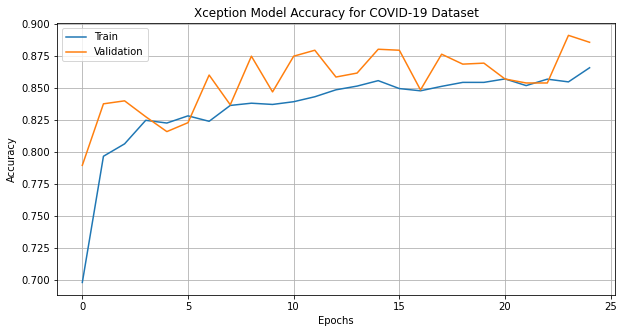

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.figure(figsize=(10,5))

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('Xception Model Accuracy for COVID-19 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])

plt.show()

In [ ]:
max_acc = max(graph.history['val_accuracy'])
print("The highest validation accuracy achieved using Xception model is", max_acc*100)

The highest validation accuracy achieved using Xception model is 89.08668756484985
